# Import Necessary Libraries

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
import matplotlib.pyplot as plt

# Load the Dataset

In [ ]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

**Build the Model**

In [ ]:
batch_size=64

num_classes=10

epochs=10

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

  return model

# Train the Model

In [ ]:
# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', 'SGD Momentum']

hists = []

for i in optimizers:
  print("---------------------------{0}-------------------------".format(i))

  if i == 'SGD':
      # For SGD without Momentum, specify the momentum parameter
      momentum = 0.0  # You can adjust this value as needed
      optimizer = keras.optimizers.SGD(momentum=momentum)
  elif i == 'SGD Momentum':
    optimizer = 'SGD'
  else:
      optimizer = i  # For other optimizers, use the string directly

  model = build_model(optimizer)

  start_time = time.time()  # Record the start time
  print("-------------------Start time: ", start_time)

  hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

  end_time = time.time()  # Record the end time
  print("-------------------End time: ", end_time)
  duration = end_time - start_time
  print("Training duration: {:.2f} seconds".format(duration))

  hists.append(hist)

---------------------------Adadelta-------------------------
-------------------Start time:  1709951911.7369082
Epoch 1/10
938/938 [==============================] - 52s 55ms/step - loss: 2.2732 - accuracy: 0.1553 - val_loss: 2.1852 - val_accuracy: 0.4936
Epoch 2/10
938/938 [==============================] - 50s 54ms/step - loss: 2.1415 - accuracy: 0.3364 - val_loss: 2.0405 - val_accuracy: 0.6502
Epoch 3/10
938/938 [==============================] - 50s 54ms/step - loss: 2.0024 - accuracy: 0.4836 - val_loss: 1.8815 - val_accuracy: 0.7175
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 1.8521 - accuracy: 0.5733 - val_loss: 1.7105 - val_accuracy: 0.7585
Epoch 5/10
938/938 [==============================] - 51s 54ms/step - loss: 1.6932 - accuracy: 0.6301 - val_loss: 1.5353 - val_accuracy: 0.7818
Epoch 6/10
938/938 [==============================] - 50s 53ms/step - loss: 1.5339 - accuracy: 0.6692 - val_loss: 1.3671 - val_accuracy: 0.7991
Epoch 7/10
938/938 [====

ValueError: Unknown optimizer: 'SGD Momentum'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', 'SGD Momentum']
print("---------------------------{0}-------------------------".format("SGD Momentum"))
# SGD with Momentum
model = build_model('SGD')
start_time = time.time()  # Record the start time
print("-------------------Start time: ", start_time)

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end_time = time.time()  # Record the end time
print("-------------------End time: ", end_time)
duration = end_time - start_time
print("Training duration: {:.2f} seconds".format(duration))
hists.append(hist)

---------------------------SGD Momentum-------------------------
-------------------Start time:  1709954436.2539537
Epoch 1/10
938/938 [==============================] - 49s 52ms/step - loss: 0.8254 - accuracy: 0.7541 - val_loss: 0.3000 - val_accuracy: 0.9144
Epoch 2/10
938/938 [==============================] - 50s 54ms/step - loss: 0.3832 - accuracy: 0.8832 - val_loss: 0.2276 - val_accuracy: 0.9347
Epoch 3/10
938/938 [==============================] - 41s 44ms/step - loss: 0.3086 - accuracy: 0.9069 - val_loss: 0.1840 - val_accuracy: 0.9463
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2697 - accuracy: 0.9198 - val_loss: 0.1595 - val_accuracy: 0.9533
Epoch 5/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2409 - accuracy: 0.9276 - val_loss: 0.1421 - val_accuracy: 0.9588
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.2219 - accuracy: 0.9334 - val_loss: 0.1307 - val_accuracy: 0.9609
Epoch 7/10
938/938 [

In [ ]:
print(hists[0].history)

{'loss': [2.2344789505004883, 2.098952054977417, 1.9491976499557495, 1.7902525663375854, 1.6278421878814697, 1.4757716655731201, 1.3386008739471436, 1.217502474784851, 1.1122583150863647, 1.0253850221633911], 'accuracy': [0.20755000412464142, 0.3857666552066803, 0.5163499712944031, 0.592033326625824, 0.6420333385467529, 0.6724166870117188, 0.6970999836921692, 0.7143166661262512, 0.7319499850273132, 0.7451000213623047], 'val_loss': [2.1461219787597656, 1.9867066144943237, 1.8134769201278687, 1.6348806619644165, 1.4614969491958618, 1.3012800216674805, 1.158607840538025, 1.0360639095306396, 0.9329088926315308, 0.8477174639701843], 'val_accuracy': [0.5128999948501587, 0.6607000231742859, 0.7303000092506409, 0.7653999924659729, 0.7889999747276306, 0.8080000281333923, 0.8188999891281128, 0.8292999863624573, 0.8375999927520752, 0.8431000113487244]}


In [ ]:
# # Create the data
# optimizers = ["SGD", "SGD mom", "RMSprop", "Adam", "Adagrad", "Adadelta"]
# losses = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

# # Create the plot
# plt.figure(figsize=(10, 6))

# for hist in hists:
#   plt.plot(hist.history["accuracy"], marker='o', linestyle='-')




# # Set the axis labels
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")

# # Set the title of the plot
# plt.title("Comparison of Optimizers")

# # Show the plot
# plt.grid(True)
# plt.show()

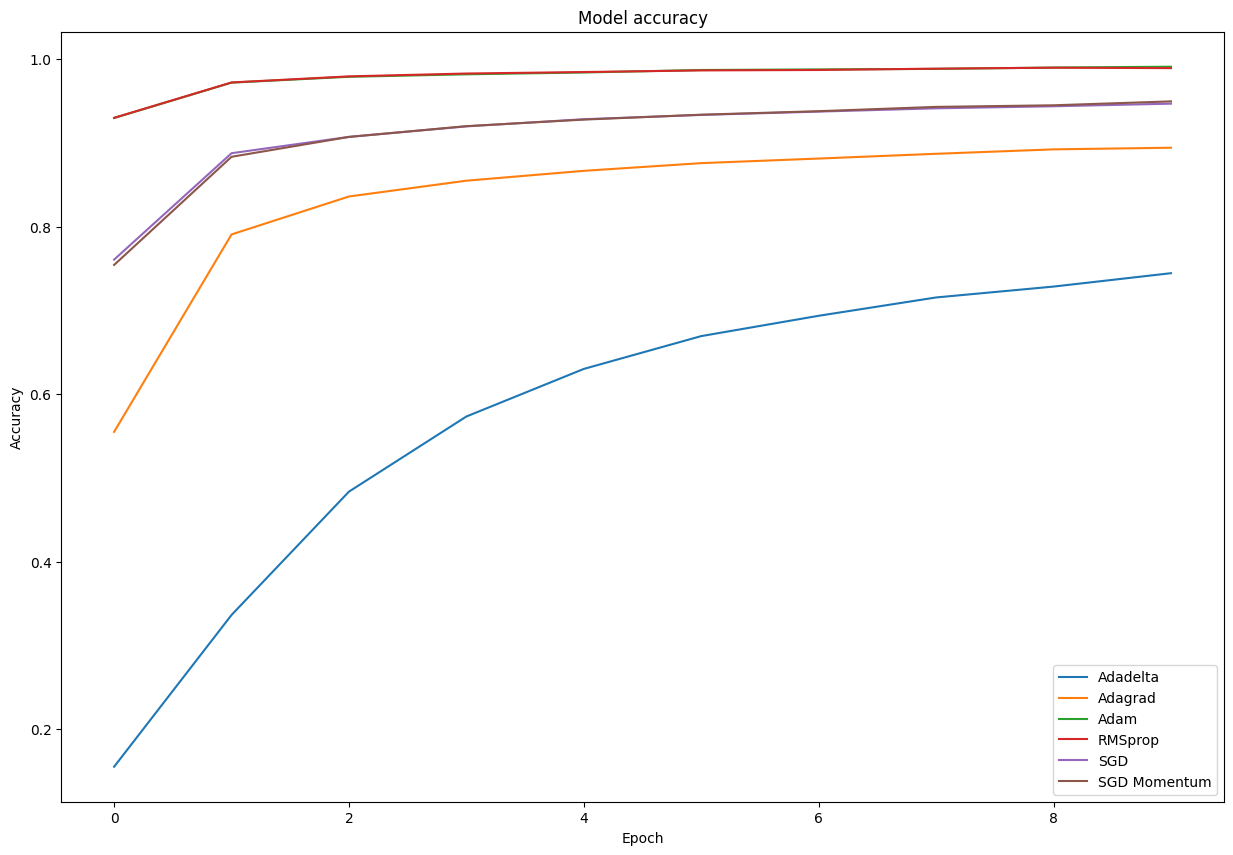

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15, 10))

for hist in hists:
  plt.plot(hist.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(optimizers, loc='lower right')
plt.show()

In [ ]:
len(hists)

6

In [ ]:
# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
optimizers1 = ['Adam', 'RMSprop']

hists1 = []

for i in optimizers1:
  print("---------------------------{0}-------------------------".format(i))

  optimizer = i  # For other optimizers, use the string directly

  model = build_model(optimizer)

  start_time = time.time()  # Record the start time
  print("-------------------Start time: ", start_time)

  hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

  end_time = time.time()  # Record the end time
  print("-------------------End time: ", end_time)
  duration = end_time - start_time
  print("Training duration: {:.2f} seconds".format(duration))

  hists1.append(hist)

---------------------------Adam-------------------------
-------------------Start time:  1709955836.3650637
Epoch 1/10
938/938 [==============================] - 50s 52ms/step - loss: 0.2293 - accuracy: 0.9308 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 2/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0911 - accuracy: 0.9722 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 3/10
938/938 [==============================] - 46s 50ms/step - loss: 0.0707 - accuracy: 0.9783 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 4/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 5/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 6/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0365 - val_accuracy: 0.9878
Epoch 7/10
938/938 [========